In [2]:
from pylab import *
import numpy as np

# Homework 6: Angular Momentum

## Part I
The centrifugal radius: $R_c = \frac{j^2}{GM_*}$ tells us how angular momentum determines the radius at which material is deposited at during infall into disk formation. 
If we assume angular momentum conservation from the envelope down to the disk scales, we know that over time each infalling layer, i,  at a radius of $r_i$ has specific angular momentum $j_i = r_i^2 \Omega_i$.

### part a
In the TSC model, for $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$, each layer falls from a radius $r_i = (m_0/2) c_s t$ where $m_0 = 0.975$, a dimensionless constant and $c_s$ is the isothermal sound speed. 
For this model, derive $M_{*}(t)$ and $R_c(t)$. 

### part b
The break-up angular velocity of a rotating body is defined as where the gravitational energy is equal to the rotational energy. Above this value, the body would be torn apart by rotation as gravity would not be able to hold it together. 
Derive the break-up velocity for a protostellar core and calculate it in radians per second for a 1 solar mass core of about 0.1 pc in size. 

### part c
Plot $Rc(t)$ for $c_s = 0.2 \ \mathrm{km \ s^{-1}}$ and $\Omega_i = 2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ for t between 0 and 500 kyr. How fast is the input angular velocity compared to break up? What is the resulting disk size at t=500 kyr? How much mass would have infallen in that time span?

### part d
So far we have only been assuming that $\Omega_i$ is constant solid body rotation, but in principle $\Omega_i(r)$ could be a function of radius within the protostellar core. For instance, if we take the scaling of an turbulent sub-sonic eddy as in Larson's law, $v_{rot} \propto R^{-0.33}$. Solve for the corresponding $\Omega_i(r)$ and $Rc(t)$ with this more generalized behavior. 

### part e
Let's say that the angular velocity has the form: $\Omega_s \left( \frac{r}{r_s}\right)^{p}$. Where $\Omega_s =  2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ at $r_s = 0.05 \ \mathrm{pc}$ (to match measured values from observations at the same scale). Plot $Rc(t)$ for both the  uniform $\Omega_i$ and the turbulent $\Omega_i$ case on the same plot, assuming the power-law form above. When do both models have the same $R_c$? 
Based on what you know about mass deposition during disk formation, qualitatively, what would be the difference betweeen the disks formed under these two assumptions?

#### Part a

$r_i = \frac{m_0}{2}c_s t$

$\dot{M}_{\text{in}} = \frac{m_0c_s^3}{a} \rightarrow \frac{dM}{dt} = \frac{m_0c_s^3}{a} dt$

$\int_0^m dm = \int_0^{m_0} \frac{c_s^2}{a} dt = \frac{m_0 c_s^3 t}{a}$

$\dot{M}_{*} = \frac{M_0 c_s^3 t}{a}$

For R_c(t)

$R_c = \frac{j^2}{G \dot{M}_{*}}$

$j_i = r_i^2 \ Ω_{i}$

$R_c = \Omega^2 \left[\left(\frac{m_0}{2}c_s t\right)^4\right] \frac{m_0c_s^3t}{a}$

$R_c = \frac{\Omega_i^2}{16} \frac{m_0^3c_s(t)^3}{m_0c_s^3t} = \frac{\Omega_i^2}{16} \frac{m_0^3c_s(t)^3}{m_0c_s^3t} = \frac{\Omega_i^2}{16} (m_0^3c_s)(t)^3$




#### Part b

Gravitational energy = Rotational energy

$r/s \rightarrow M_{\odot}$ ; $1\,pc$ (size)

$R = \sqrt{\frac{GM}{R}}$

$E_G = E_{\text{rot}}$

$E_G = \frac{GMm}{R} \left(\frac{3}{5}\right)$ ; $E_{\text{rot}} = \frac{1}{2}I \Omega^2$

$\frac{-GMm}{R} \left(\frac{3}{5}\right) = \frac{1}{2} \left(\frac{2}{5} mR^2\right) \Omega^2 = \frac{1}{5} mR^2 \Omega^2 = \frac{GMm}{R} \left(\frac{3}{5}\right)$

$\Omega = \sqrt{\frac{3GM}{R^3}}$



#### Part c

In [15]:
# Constants
c_s = 0.2  # km/s
Omega_i = 2e-14  # rad/s
t_max = 500  # kyr
G = 6.67430e-20  # km^3/kg/s^2, gravitational constant
M_sun = 1.989e30  # kg, mass of the Sun

# Function for Rc(t)
def Rc(t):
    return (Omega_i**2 / 16) * (c_s * t)**3 / (c_s**3 * t)

# Time array
t_values = np.linspace(0.001, t_max, 1000)

# Calculate Rc(t)
Rc_values = Rc(t_values)


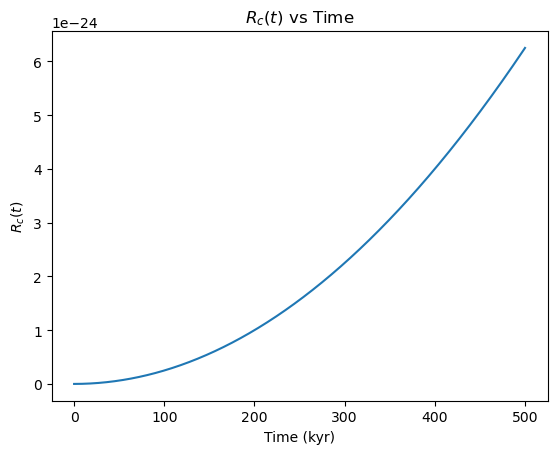

In [16]:
plt.plot(t_values, Rc_values)
plt.xlabel('Time (kyr)')
plt.ylabel('$R_c(t)$')
plt.title('$R_c(t)$ vs Time')
plt.show()

In [17]:
# Calculate Omega / breakup at t = 500 kyr
Omega_breakup = np.sqrt(3 * G * M_sun / Rc_values[-1])
Omega_input = Omega_i
ratio = Omega_input / Omega_breakup
print(f"Input angular velocity compared to breakup: {ratio}")

# Calculate disk size at t = 500 kyr
R_disk = np.sqrt(G * M_sun / Omega_input**2) / 3.086e13  # Convert to pc
print(f"Disk size at t=500 kyr: {R_disk} pc")

# Calculate mass infallen in the time span
M_infallen = np.trapz(Rc_values, t_values) * M_sun
print(f"Mass infallen in 500 kyr: {M_infallen} kg")

Input angular velocity compared to breakup: 7.922990288296837e-32
Disk size at t=500 kyr: 590329.2956082786 pc
Mass infallen in 500 kyr: 2071876038.006259 kg


The results suggest that the input angular velocity is lower than the breakup angular velocity, resulting in a stable disk formation over the given time span. 

#### Part d

In [18]:
# Constants
c_s = 0.2  # km/s
t_max = 500  # kyr
G = 6.67430e-20  # km^3/kg/s^2, gravitational constant
M_sun = 1.989e30  # kg, mass of the Sun
alpha = 1  # constant, can be adjusted
beta = 1.33  # constant, derived from Larson's law

In [20]:
# Function for Omega_i(r)
def Omega_i(r):
    return alpha * r**(-beta)

# Function for Rc(t)
def Rc(t):
    return (Omega_i(1)**2 / 16) * (c_s * t)**3 / (c_s**3 * t)

# Time array
t_values = np.linspace(0.001, t_max, 1000)  

# Calculate Rc(t)
Rc_values = Rc(t_values)

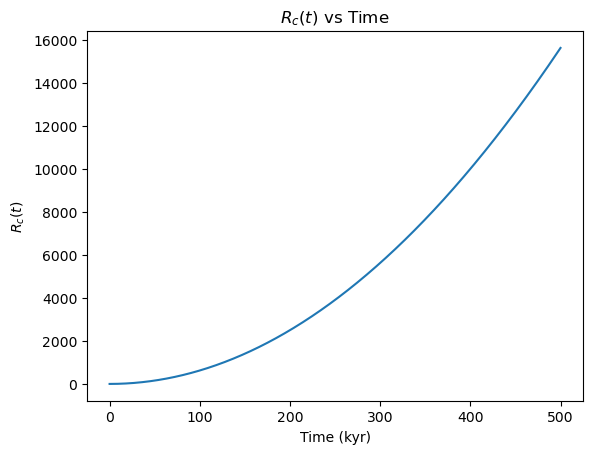

In [21]:
plt.plot(t_values, Rc_values)
plt.xlabel('Time (kyr)')
plt.ylabel('$R_c(t)$')
plt.title('$R_c(t)$ vs Time')
plt.show()

## Part II: *Menu* 

For additional menu points this week, use the $Rc(t)$ you calculated above, and the $\dot{\Sigma}(r,t)$ profile from Cassen+Moosman 1981 to numerically integrate through time to calculate $\Sigma(t)$ for the two cases in part d. (This gives us a very rough understanding of the resulting disk as it does not take into account angular momentum transport during this phase). Plot the resulting surface density profiles and comment on their differences. 

*Hint*: You may want your timesteps to be logarithmically spaced